<a href="https://colab.research.google.com/github/ayogkr21/BlackJack-Game/blob/main/Gold__Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Gold Data Collection

In [6]:
# laod the CSV file data to Panda DATAFRAME
gold_D=pd.read_csv("/content/gld_price_data.csv")


In [8]:
# First Five DATA FRAME
gold_D.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
#Last Five DATA Frame
gold_D.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
#number of rows and columns
gold_D.shape

(2290, 6)

In [12]:
# Getting some Basic informations about the data
gold_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
# checking the number of missing values
gold_D.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [17]:
#Getting the statical measures of DATA
gold_D.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


##### correlation:

1.   Positive Correlation
2.   Negative Correlation




In [18]:
correlation=gold_D.corr()

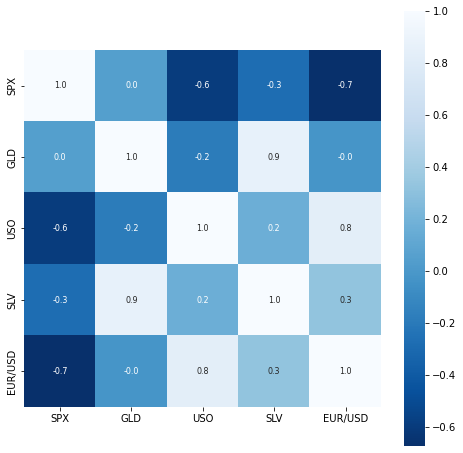

In [27]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues_r')

In [28]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


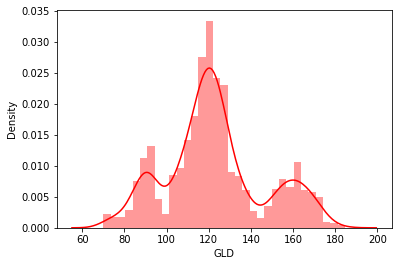

In [32]:
# checking the distribution of the GLD Price
sns.distplot(gold_D['GLD'],color='Red')

Splitting the Features and Target

In [34]:
X = gold_D.drop(['Date','GLD'],axis=1)
Y = gold_D['GLD']

In [35]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [38]:
regressor = RandomForestRegressor(n_estimators=100)

In [40]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [41]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [42]:
print(test_data_prediction)

[168.65729924  81.91869986 115.83650037 127.65010069 120.73970124
 154.77149793 150.47339885 126.13250029 117.4582987  126.04010052
 116.63450117 172.17550124 141.54969853 167.4010986  115.02859988
 117.91130037 139.44470307 170.19190145 159.3969027  161.95889957
 155.11780022 125.26960024 175.93469948 157.27390276 125.18660053
  93.86199994  78.06609968 120.46570007 119.09289934 167.41219927
  87.97870042 125.3863999   91.33020063 117.7880003  121.05779889
 135.89740074 115.30650114 115.0299008  148.5212     107.4113005
 104.54800252  87.22059807 126.42200038 118.04379955 152.96059893
 119.52030013 108.54129981 108.40549847  93.16600036 127.19589764
  74.78590002 113.7957993  121.35150006 111.2009993  118.90499884
 120.99629924 159.14340094 167.97200088 147.039897    85.81929889
  94.2929003   86.86309902  90.79590017 119.1160008  126.48250019
 127.50479973 170.21229975 122.27669915 117.16429899  98.37770036
 168.1080004  143.31599826 132.02640205 121.06570206 121.08969945
 119.629300

In [43]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9896733578004134


Compare the Actual Values and Predicted Values in a Plot

In [44]:
Y_test = list(Y_test)

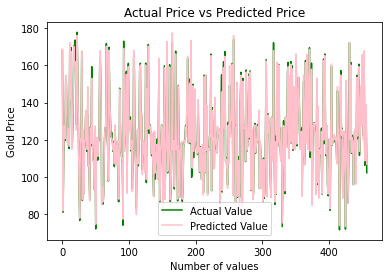

In [51]:
plt.plot(Y_test, color='green', label = 'Actual Value')
plt.plot(test_data_prediction, color='pink', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()